## 7. Group Assignment & Presentation




__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, preprocessing, callbacks, Input, Sequential

2024-05-17 13:55:55.703570: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 13:55:55.703729: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 13:55:55.852825: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


The dataset that we are using comes from kaggle. It contains pictures of cards. The problem that we are solving is classify card into correct combination of rank and suit, e.g "3 of spades". Therefore, there are 53 classes (with joker). The dataset on kaggle was already structured in a way that makes it easy to load using tensorflow. The are 3 folders: train, test and validation. Each folder contains 53 subfolders, one for each class. Each subfolder contains images of cards of that class. The images are originally 256x256 pixels. 

## Let's start by loading data, inspecting it and preprocessing it.

In [2]:
# to make training faster we will resize the images to 128x128
# we will use a batch size of 64 (the number of images that will be processed at once)
# we will train the model for up to 100 epochs (the number of times the model will see the entire dataset)

img_size = 128
batch_size = 64
n_epoch = 100


# load the data
# if the training is not done locally, but in a hosted environment (such as on kaggle), the path might be different
# current_dir = os.getcwd()

# data_path = os.path.join(current_dir, "data")

data_path = "/kaggle/input/cards-image-datasetclassification"


# load the data
# while loading we resize the images to 128x128 and shuffle the data so that the model does not learn the order of the images
# we also use one-hot encoding for the labels (this is format of label required by categorical_crossentropy loss function)
train_dataset = preprocessing.image_dataset_from_directory(
    os.path.join(data_path, 'train'), batch_size = batch_size, image_size = (img_size, img_size), shuffle = True,
    label_mode ='categorical')

val_dataset = preprocessing.image_dataset_from_directory(
    os.path.join(data_path, 'valid'), batch_size = batch_size, image_size = (img_size, img_size), shuffle = True,
label_mode ='categorical')

test_dataset = preprocessing.image_dataset_from_directory(
    os.path.join(data_path, "test"), batch_size = batch_size, image_size = (img_size, img_size), shuffle = True,
    label_mode ='categorical')


Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [3]:
import os

# let see the classes in the dataset
classes = os.listdir(os.path.join(data_path, 'train'))
classes.sort()
n_class = len(classes)

print(f"Number of classes: {n_class}")

# this dictionary will be useful later to convert the class index to class name during prediction
class_indices = {i: class_name for i, class_name in enumerate(classes)}

print(class_indices)

Number of classes: 53
{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spad

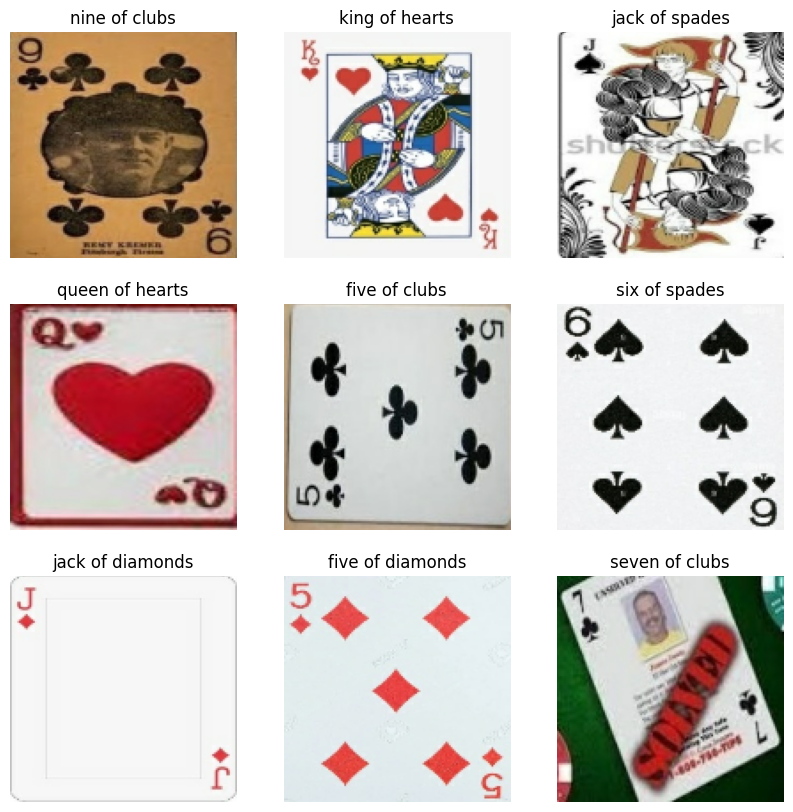

2024-05-16 23:41:02.736676: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [138]:
sample_batch = train_dataset.take(1)

# let's see random images from the dataset with their labels
for images, labels in sample_batch:

    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_indices[np.argmax(labels[i])])
        plt.axis("off")

    plt.show()


In [4]:
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(64, 128, 128, 3)
(64, 53)


Looking at the shape of data we can see that we are dealing with 4D input. The first dimension is batch dimension, so the number of images in the batch. The second and third dimensions are the height and width of the image. The last dimension is the number of channels in the image. We have 3 channels as the images are in RGB format. 

In [5]:
# let's how examplary image is represented in the dataset

for image_batch, labels_batch in train_dataset:
    print(image_batch[0].numpy().astype("uint8"))
    break

# as we can see the image is represented as a 3D matrix (128x128x3) with values between 0 and 255

[[[250 247 253]
  [248 245 252]
  [246 243 250]
  ...
  [192 192 197]
  [174 173 181]
  [192 192 203]]

 [[245 242 249]
  [242 239 246]
  [236 233 240]
  ...
  [234 235 239]
  [195 194 202]
  [178 180 187]]

 [[249 246 253]
  [250 247 254]
  [249 246 253]
  ...
  [244 242 248]
  [235 234 240]
  [169 174 177]]

 ...

 [[186 185 190]
  [190 190 192]
  [199 199 199]
  ...
  [238 237 245]
  [225 224 232]
  [219 218 226]]

 [[234 235 237]
  [234 235 237]
  [234 232 233]
  ...
  [226 225 233]
  [223 222 230]
  [234 233 241]]

 [[249 253 253]
  [250 251 253]
  [246 245 246]
  ...
  [231 230 238]
  [235 233 244]
  [240 240 250]]]


In [6]:
# We don't to deal with data with values between 0 and 255, so we will rescale the pixel values to the range [0, 1]
def preprocess_image(image, label):
    # Rescale pixel values to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [7]:
# Here we first apply the rescaling function, then calling cache method, that will keep the images in memory after they're loaded off disk for the first time
# Then we shuffle the data and prefetch it, so that the next batch of data is ready to be processed while the current batch is being processed
# This will make the training faster
train_dataset = train_dataset.map(preprocess_image).cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().map(preprocess_image).shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().map(preprocess_image).shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

In [8]:
# now let's see how the image is represented after preprocessing

for image_batch, labels_batch in train_dataset:
    print(image_batch[0].numpy())
    break

# the pixel values are now between 0 and 1

[[[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 ...

 [[0.00784314 0.0004902  0.00343137]
  [0.00735294 0.0004902  0.00343137]
  [0.00735294 0.0004902  0.00343137]
  ...
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]]

 [[0.00784314 0.00392157 0.        ]
  [0.00392157 0.00392157 0.        ]


### Let's talk about model architecture.

We are going to use a convolutional neural network. It is going to be a quite deep one. The main points of this architecture are:
- model takes as input (128x128x3) images in a batch (a 4th dimension)
- the model is going have 4 blocks of convolutional layers with combined with max pooling
- each block contains of 2 same conv layers and then max pooling layer
- the number of filters in each block is going to increase, starting from 32 and ending with 256, that way the model is going to be able to learn more complex features
- the kernel size in each block is decreasing, starting from 7x7 and ending with 3x3, that way the model is going to be able to learn more detailed features
- each block contains of 2 same conv layers, it is a common technique, first layer might learn about simpler features such as edges, and the second layer might learn about more complex and abstract features of the image
- max pooling layer, decreases the number of parameters in the model, also it reduces noise by taking the maximum value in the region, the pool size is 2x2 so we are going to keep the most important information from every 2x2 region
- after convolutional blocks, we flatten the output, meaning we convert it from matrix to vector so that it can be fed to the the dense layers
- our model contains of 1 hidden fully connected layer and output layer
- in between fully connected layers there are dropout layers, they are there to prevent overfitting (so they serve as regularization mechanism), they randomly set some of the neurons weights to zero, so that the model is not able to rely on any single neuron (50% to disable a neuron)
- in all layers we use the same activation function, ReLU, as it is a very common choice, because it is computationally efficient
- following recommendations found online, to initialize weights in all layers we are going to use He initialization, it is a good choice for ReLU activation function
- in last layer we are going to use softmax activation function, as it is a multi-class classification problem, thanks to that will be able to get probabilities of each class
- the padding in convolutional layers is going to be 'same', so that the output has the same height and width as the input, otherwise we might have lost some information, as the filter would not be able to slide over the edges of the image, now with padding set up if there is not enough pixels to slide over, the missing pixels are filled with zeros (padded)
- as optimizer instead of SGD we are going to use Adam, it is recommended choice by community, as it is computationally efficient and requires little memory, it is also well suited for problems with large amounts of data and parameters
- the loss function is going to be categorical crossentropy, as it is a multi-class classification problem, during training we will be also measuring accuracy

In [9]:
def compile_model():
    model = Sequential([
        Input(shape=(img_size,img_size,3)),
        layers.Conv2D(filters=32, kernel_size=7, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.Conv2D(filters=32, kernel_size=7, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Conv2D(filters=96, kernel_size=5, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.Conv2D(filters=96, kernel_size=5, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.Conv2D(filters=128, kernel_size=5, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(units=256, activation="relu", kernel_initializer="he_normal"),
        layers.Dropout(0.5),
        layers.Dense(units=n_class, activation="softmax")
    ])

    optimizer = tf.keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model


In tenserflow Keras, there is a concepts of callbacks, these are types of functions that are called at certain points during training. We are going to use two of them. 

The first one is early stopping, it is going to monitor the validation loss and stop the training if it does not decrease for 10 epochs. It is a way to prevent overfitting and also we won't have to monitor the training process all the time + waste resources, when the model is actually not learning anything new anymore.

In [10]:
early_stopping_callback = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

The second callback is learning rate scheduler, this allows us to implement learning rate decay, by reducing it from 0.001 to 0.0001 after 30 epochs. We do this, because as we get closer to minimum of loss function, we want to take smaller steps, so that we don't overshoot the minimum.

In [11]:
def lr_scheduler(epoch, lr):
    if epoch < 30:
        return 1E-3
    else:
        return 1E-4

learning_rate_decay_callback = callbacks.LearningRateScheduler(lr_scheduler)

Now let's train the model and see how it performs. 

Because the image data is quite complex one and the model architecture is quite deep, the training process is going to take some time.
Because of that, when we were training the model we didn't do it locally, but rather ran this notebook in kaggle environment, as they offer free GPU resources.
GPU allows to run training loop usin CUDA, which is a parallel computing platform and API model created by Nvidia. Gpus are created to perform parralel computations, so they are much faster than CPUs when it comes to training deep learning models.

On GPU instance singular epoch was taking around 10s to complete, while on CPU the time for singular epoch was in minutes

In [12]:
model = compile_model()

# train for 100 epochs, pass the callbacks we mentioned, and the training and validation datasets as well as desired batch size

history = model.fit(train_dataset, epochs=n_epoch, batch_size=batch_size, validation_data=val_dataset, callbacks=[early_stopping_callback, learning_rate_decay_callback])


Epoch 1/100


I0000 00:00:1715954279.612880     137 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715954279.632897     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 92/120 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - accuracy: 0.0216 - loss: 4.1337

W0000 00:00:1715954308.503142     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.0221 - loss: 4.1029

W0000 00:00:1715954319.187991     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


120/120 ━━━━━━━━━━━━━━━━━━━━ 98s 332ms/step - accuracy: 0.0221 - loss: 4.1020 - val_accuracy: 0.0189 - val_loss: 3.9706 - learning_rate: 0.0010
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.0216 - loss: 3.9679 - val_accuracy: 0.0189 - val_loss: 3.9717 - learning_rate: 0.0010
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.0238 - loss: 3.9660 - val_accuracy: 0.0189 - val_loss: 3.9726 - learning_rate: 0.0010
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.0245 - loss: 3.9665 - val_accuracy: 0.0189 - val_loss: 3.9748 - learning_rate: 0.0010
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.0208 - loss: 3.9699 - val_accuracy: 0.0189 - val_loss: 3.9726 - learning_rate: 0.0010
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.0224 - loss: 3.9654 - val_accuracy: 0.0189 - val_loss: 3.9732 - learning_rate: 0.0010
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 163ms/step - accuracy: 0.0239 -

After 35 epochs, the training stop as we didn't see validation loss decrease in 10 epochs, so the callback fired and stopped training. During this time, the model achieved 83% accuracy on the validation set and 89% on the training set. Let's see on the graph how the loss and accuracy changed during training.

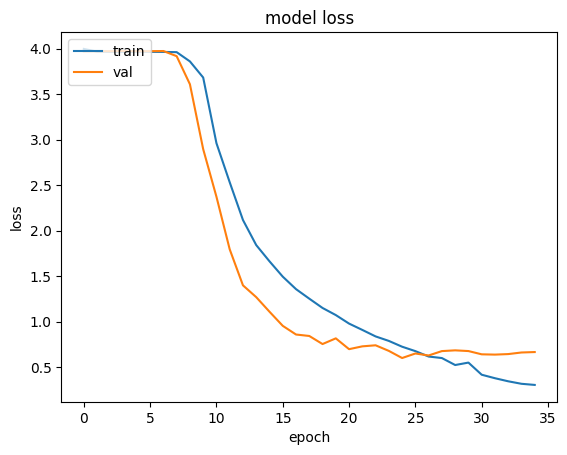

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

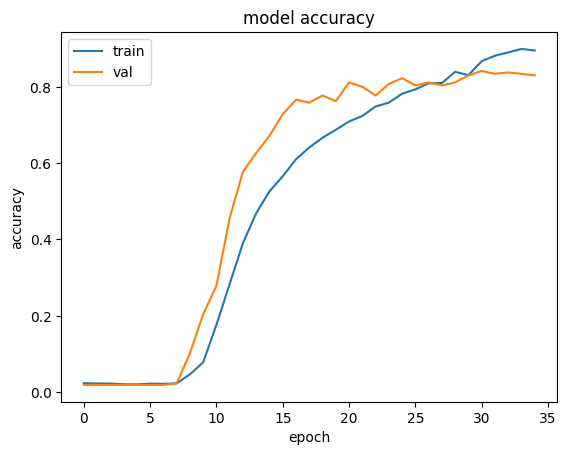

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [15]:
# finally let's evaluate the model on the test dataset
test_acc = model.evaluate(test_dataset)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8338 - loss: 0.6606


We got 83% accuracy on the test set, which we believe is quite a good result

In [17]:
# using save method we can save the model to disk, so that we can load it later and use it for prediction, without the need for retraining
model.save("model.h5")

If we want to load the model and use it for predictions, we can do it like this:
``` python
from keras.models import load_model

model = load_model("model.h5")
```

### Inference

To test the model in real life, scenario we downloaded 5 random pictures of cards from google (they are not in any of datasets). We want to try to see if the model will be able to classify them correctly.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


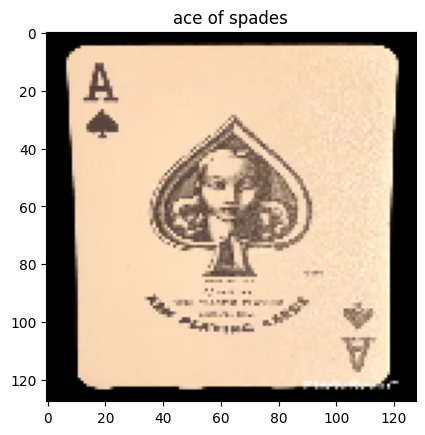

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


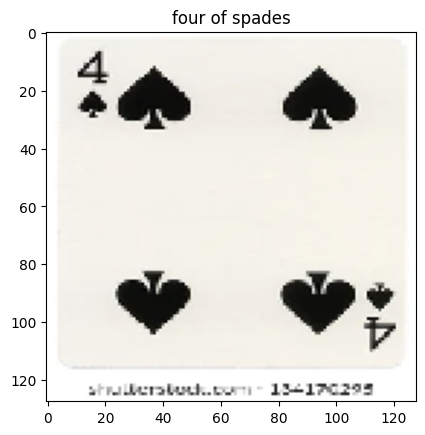

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


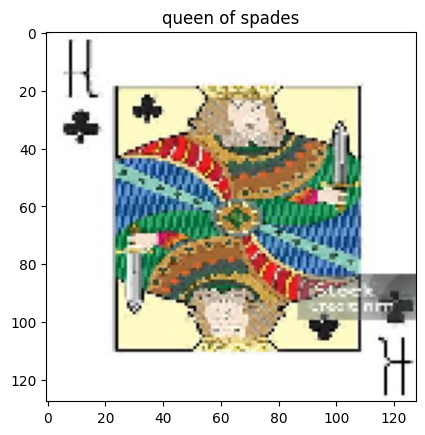

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


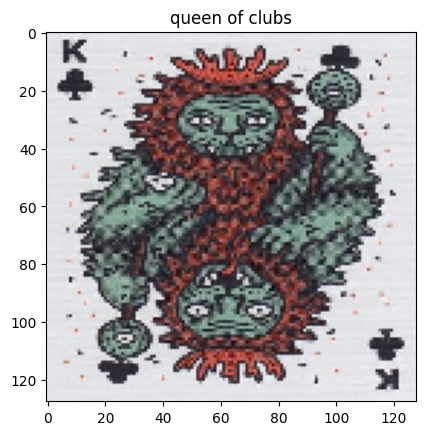

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


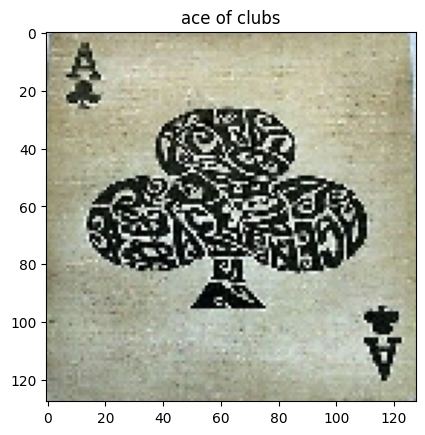

In [103]:
import numpy as np

# we can create a helper function that will take an image as input, preprocess it, and make a prediction and return the class name
def infer(img):
    # first we turn image into mathematical representation
    img_array = preprocessing.image.img_to_array(img)
    # our model is used to taking batches of images, so we need to expand the dimensions of the image
    # (adding a dimension of size 1 in front of the image array)
    # in order to create a fake batch (batch size of 1)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create a fake batch

    # Normalize the image data (because the model was trained on normalized data)
    img_array = img_array / 255.0

    # Make prediction
    prediction = model.predict(img_array)

    # Get index of the class with the highest probability
    index = np.argmax(prediction[0,:])

    # return the class name using the dictionary created at the beginning
    return class_indices[index]

# we stored our data in infer folder, we are also resizing it while loading
for i in range(5):
    img = preprocessing.image.load_img(os.path.join(data_path, "infer", str(1+i) + ".jpg"), target_size=(img_size, img_size))
    plt.imshow(img)
    plt.title(infer(img))
    plt.show()

As we can see the model predicted 3/5 cards correctly. The 2 ones it mistaken king for a queen. It is understandable as the cards are quite similar.

### BONUS

A real use-case for this model could be for example found in casinos during poker games. It could detect the hand of each player and automatically return the strength of the hand. Below we implemented a single algorithm, where we take random 5 cards images from test set to imitate player's hand, then we first used our trained model to predicted what are the cards on hand. Next we count number of each rank and suit, and based on that we can return the strength of the hand (e.g. "Full house", "Two pairs", "Flush", etc.).

The algorithm and few examples of its usage are presented below.

_Disclaimer: we treated joker as an ace in order to avoid crazy edgecases_



In [104]:
from collections import Counter

# mapping between rank names and their numerical values
ranks = {
    'two': 0,
    'three': 1,
    'four': 2,
    'five': 3,
    'six': 4,
    'seven': 5,
    'eight': 6,
    'nine': 7,
    'ten': 8,
    'jack': 9,
    'queen': 10,
    'king': 11,
    'ace': 12
}


def score_poker_hand(images):

    # get model predictions
    model_prediction = model.predict(images)

    # get the class name of the predicted class for each image 
    model_prediction = np.argmax(model_prediction, axis=1)

    predicted_classes = [class_indices[i] for i in model_prediction]

    hand = []

    # if the model predicts joker, we will replace it with ace of clubs
    # otherwise extract rank value and suit from the predicted class name
    for card in predicted_classes:
        if 'joker' in card:
            hand.append(('ace', 'clubs'))
            continue
        rank, suit = card.split(" of ")
        rank = ranks[rank]
        hand.append((rank, suit))

    # count the number of occurrences of each rank and suit in the hand
    hand_ranks = Counter([i[0] for i in hand])

    hand_suits = Counter([i[1] for i in hand])

    fig, ax = plt.subplots(1, 5, figsize=(20, 5))

    for i in range(5):
        ax[i].imshow(images[i])
        ax[i].axis("off")
        ax[i].set_title(predicted_classes[i])

    # from here down, it's a logic to determine the poker hand based on the hand ranks and suits
    # unfortunately, no machine learning involved, just straight up logic
    is_flush = len(hand_suits) == 1

    is_straight = max(hand_ranks) - min(hand_ranks) == 4 and len(hand_ranks) == 5

    if is_flush and is_straight:
        if max(hand_ranks) == 12:
            fig.suptitle("Royal flush", fontsize=24)
            plt.show()
            return
        else:
            fig.suptitle("Straight flush", fontsize=24)
            plt.show()
            return
    
    if len(hand_ranks) == 2:
        if 4 in hand_ranks.values():
            fig.suptitle("Four of a kind", fontsize=24)
            plt.show()
            return
        else:
            fig.suptitle("Full house", fontsize=24)
            plt.show()
            return
    
    if is_flush:
        fig.suptitle("Flush", fontsize=24)
        plt.show()
        return

    if is_straight:
        fig.suptitle("Straight", fontsize=24)
        plt.show()
        return
    
    if 3 in hand_ranks.values():
        fig.suptitle("Three of a kind", fontsize=24)
        plt.show()
        return

    if list(hand_ranks.values()).count(2) == 2:
        fig.suptitle("Two pair", fontsize=24)
        plt.show()
        return

    if 2 in hand_ranks.values():
        fig.suptitle("One pair", fontsize=24)
        plt.show()
        return
    
    fig.suptitle("High Card", fontsize=24)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


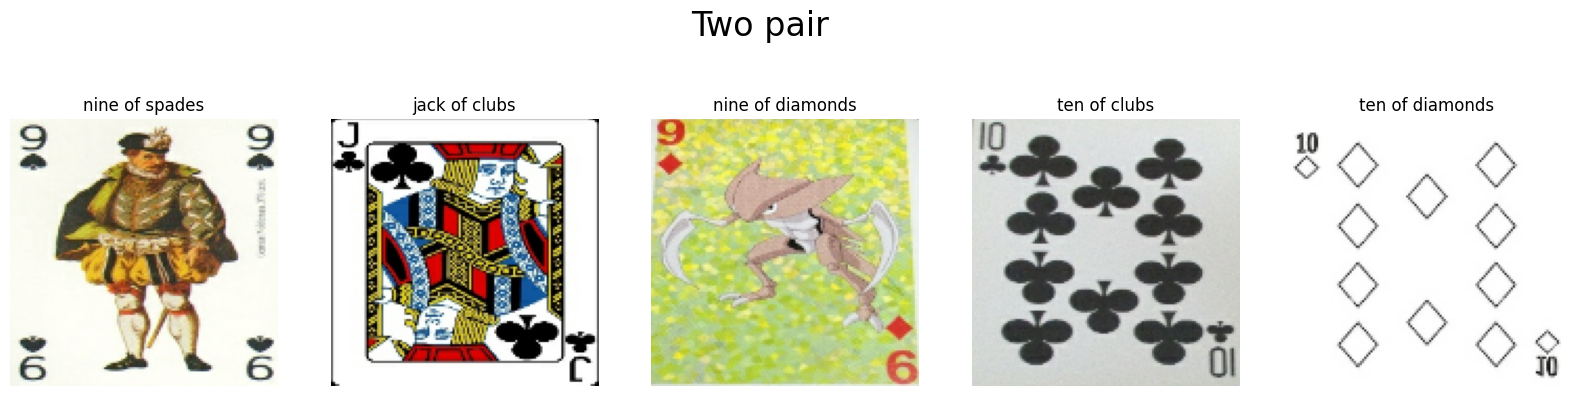

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


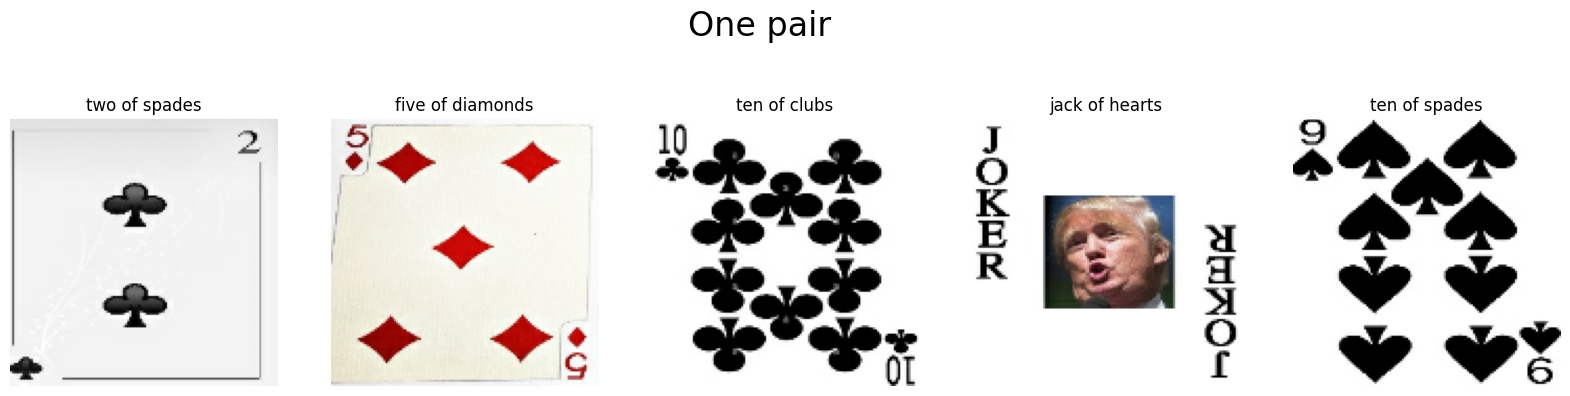

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


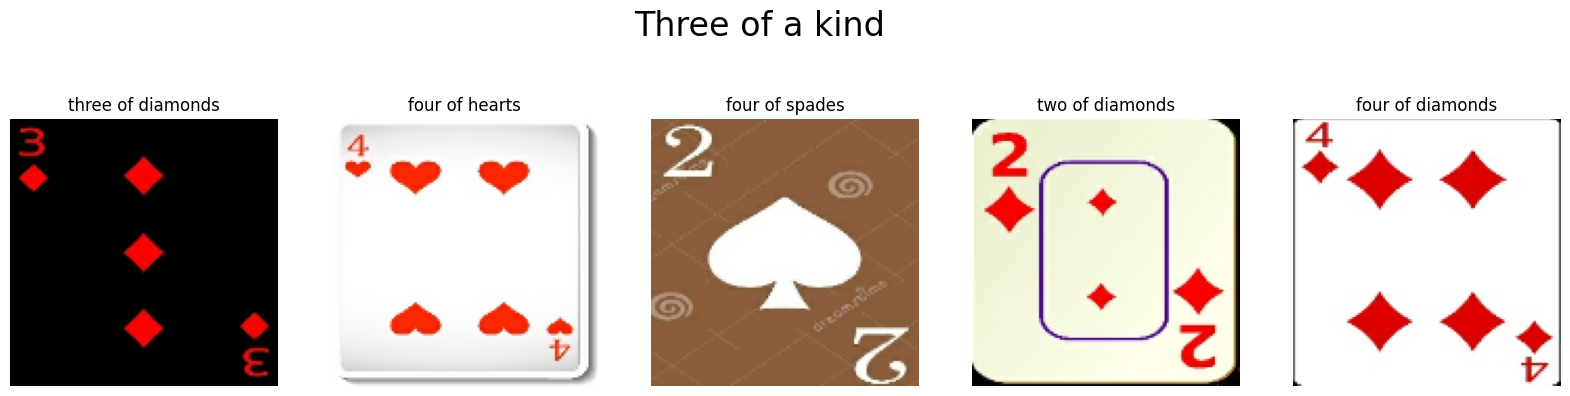

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


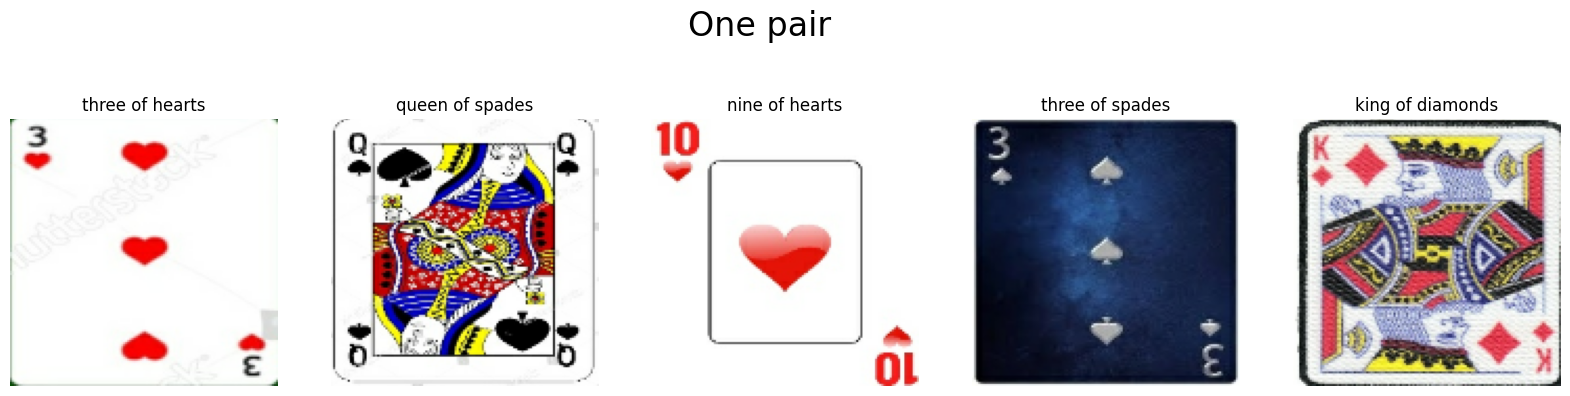

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


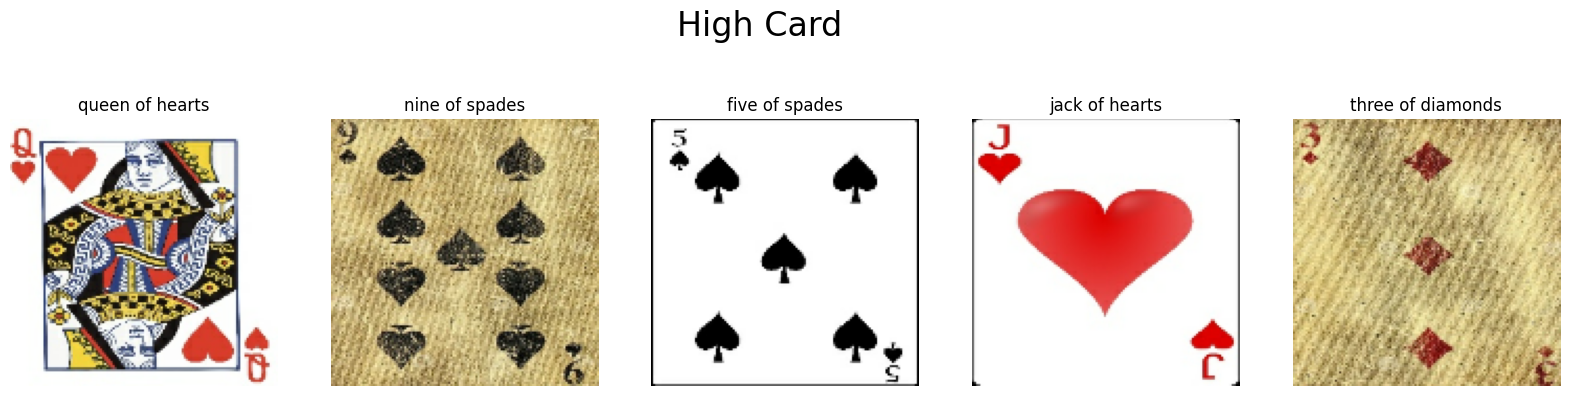

2024-05-16 23:29:39.230462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [134]:
sample_batch = test_dataset.take(1)


for images, labels in sample_batch:

    i = 0
    while True: 
        score_poker_hand(images[i:i+5,:].numpy())
        i += 5
        if i == 25:
            break

